## 1 часть. Преобразование данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

In [2]:
# Загрузка файла и создание датафрейма

my_file = pd.read_csv('./Desktop/tz_data.csv')
main_df = pd.DataFrame(my_file)
print(main_df.to_string())

            area  cluster cluster_name                                   keyword  good (1) count          x                    y
0    eligibility      0.0    Кластер 0                   several animated buried       1.0  1260   5.772342   12.564796257345005
1    eligibility      0.0    Кластер 0                    singles unusual buyers       1.0   866  14.829280   7.8507285727125815
2    eligibility      0.0    Кластер 0                        hawaiian directive       1.0   163  11.381856   3.8981370219558604
3    eligibility      0.0    Кластер 0                         dynamics directly       1.0  1146   9.980149    6.281427914064545
4    eligibility      1.0    Кластер 1                decision surgeons montreal       1.0   823   3.283940     4.39674063521296
5    eligibility      1.0    Кластер 1                          knives everybody       1.0  1377   5.607192   13.155189236409358
6    eligibility      1.0    Кластер 1                          lighting observe       1.0   281 

In [3]:
#Удаление лишнего поля 'good (1)'

main_df = main_df.drop(columns='good (1)')
main_df = main_df.assign(color=0)
main_df

,area,cluster,cluster_name,keyword,count,x,y,color
0,eligibility,0.0,Кластер 0,several animated buried,1260,5.772342,12.564796257345005,0
1,eligibility,0.0,Кластер 0,singles unusual buyers,866,14.829280,7.8507285727125815,0
2,eligibility,0.0,Кластер 0,hawaiian directive,163,11.381856,3.8981370219558604,0
3,eligibility,0.0,Кластер 0,dynamics directly,1146,9.980149,6.281427914064545,0
4,eligibility,1.0,Кластер 1,decision surgeons montreal,823,3.283940,4.39674063521296,0
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,279,10.971214,4.857810387061303,0
225,greetings,2.0,Кластер 2,sapphire grounds,335,1.160626,3.642819729434763,0
226,greetings,3.0,Кластер 3,entire ethical speakers,1782,7.985910,6.003699268483375,0
227,greetings,3.0,Кластер 3,courtesy textiles diameter,84,0.509490,4.151198803764073,0


In [4]:
# Перенос count в позицию последнего поля
main_df = main_df.reindex(columns=['area', 'cluster', 'cluster_name', 'keyword', 'x', 'y', 'count', 'color'])
main_df

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796257345005,1260,0
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.8507285727125815,866,0
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.8981370219558604,163,0
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281427914064545,1146,0
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.39674063521296,823,0
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810387061303,279,0
225,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642819729434763,335,0
226,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699268483375,1782,0
227,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151198803764073,84,0


In [5]:
# Удаление ячеек, у которых пустые все поля 
main_df.dropna(subset=list(main_df.columns), inplace=True)
main_df

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796257345005,1260,0
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.8507285727125815,866,0
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.8981370219558604,163,0
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281427914064545,1146,0
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.39674063521296,823,0
...,...,...,...,...,...,...,...,...
224,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810387061303,279,0
225,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642819729434763,335,0
226,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699268483375,1782,0
227,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151198803764073,84,0


In [6]:
# Проверка типов
main_df.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
x               float64
y                object
count            object
color             int64
dtype: object

In [7]:
# В строках 49 и 215 вместо числовых значений были строковые. Замена их на ноль

import string

main_df['count'] = [str(i) for i in main_df['count']]

indexes = []

for i, el in enumerate(main_df['count']):
    for ch in el:
        if ch in string.printable[10:-5]:
            indexes.append(i)
indexes = list(set(indexes))
indexes

[49, 215]

In [8]:
for i in indexes:
    main_df.iloc[[i], [-2]] = 0

In [9]:
# Преобразование типов
main_df['y'] = pd.to_numeric(main_df['y'], errors='coerce')
main_df['count'] = [int(i) for i in main_df['count']]

In [10]:
main_df.dtypes

area             object
cluster         float64
cluster_name     object
keyword          object
x               float64
y               float64
count             int64
color             int64
dtype: object

In [11]:
# Поиск и удаление дубликатов

area_un_words = main_df['area'].unique()

for i in area_un_words:
    duplicates_df = main_df[main_df.area == i]
    duplicates_df = duplicates_df[duplicates_df.duplicated(subset='keyword') == True].index
    main_df = main_df.drop(index=duplicates_df)

In [12]:
# Переназначил индексы

main_df = main_df.reset_index(drop=True)
main_df

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796,1260,0
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.850729,866,0
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.898137,163,0
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281428,1146,0
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.396741,823,0
...,...,...,...,...,...,...,...,...
215,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810,279,0
216,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642820,335,0
217,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699,1782,0
218,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151199,84,0


In [13]:
main_df

,area,cluster,cluster_name,keyword,x,y,count,color
0,eligibility,0.0,Кластер 0,several animated buried,5.772342,12.564796,1260,0
1,eligibility,0.0,Кластер 0,singles unusual buyers,14.829280,7.850729,866,0
2,eligibility,0.0,Кластер 0,hawaiian directive,11.381856,3.898137,163,0
3,eligibility,0.0,Кластер 0,dynamics directly,9.980149,6.281428,1146,0
4,eligibility,1.0,Кластер 1,decision surgeons montreal,3.283940,4.396741,823,0
...,...,...,...,...,...,...,...,...
215,greetings,2.0,Кластер 2,disposition layout,10.971214,4.857810,279,0
216,greetings,2.0,Кластер 2,sapphire grounds,1.160626,3.642820,335,0
217,greetings,3.0,Кластер 3,entire ethical speakers,7.985910,6.003699,1782,0
218,greetings,3.0,Кластер 3,courtesy textiles diameter,0.509490,4.151199,84,0


In [14]:
cluster_df = main_df[['area', 'cluster']]
cluster_df

,area,cluster
0,eligibility,0.0
1,eligibility,0.0
2,eligibility,0.0
3,eligibility,0.0
4,eligibility,1.0
...,...,...
215,greetings,2.0
216,greetings,2.0
217,greetings,3.0
218,greetings,3.0


In [15]:
# Убираем дубликаты в одной области "area" 
main_df = main_df.set_index(['area', 'cluster'])
main_df

cluster_name                     keyword          x  \
area        cluster                                                       
eligibility 0.0        Кластер 0     several animated buried   5.772342   
            0.0        Кластер 0      singles unusual buyers  14.829280   
            0.0        Кластер 0          hawaiian directive  11.381856   
            0.0        Кластер 0           dynamics directly   9.980149   
            1.0        Кластер 1  decision surgeons montreal   3.283940   
...                          ...                         ...        ...   
greetings   2.0        Кластер 2          disposition layout  10.971214   
            2.0        Кластер 2            sapphire grounds   1.160626   
            3.0        Кластер 3     entire ethical speakers   7.985910   
            3.0        Кластер 3  courtesy textiles diameter   0.509490   
            3.0        Кластер 3              comfort rivers   6.961866   

                             y  count  color  
area        cluster                           
eligibility 0.0      12.564796   1260      0  
            0.0       7.850729    866      0  
            0.0       3.898137    163      0  
            0.0       6.281428   1146      0  
            1.0       4.396741    823      0  
...                        ...    ...    ...  
greetings   2.0       4.857810    279      0  
            2.0       3.642820    335      0  
            3.0       6.003699   1782      0  
            3.0       4.151199     84      0  
            3.0       6.435590   1806      0  

[220 rows x 6 columns]

In [16]:
main_df.dtypes

cluster_name     object
keyword          object
x               float64
y               float64
count             int64
color             int64
dtype: object

In [17]:
# Сортировка

main_df = main_df.sort_values(['area', 'cluster', 'cluster_name' ,'count'], ascending=[True, True, True, False])
print(main_df.to_string())

                    cluster_name                                   keyword          x          y  count  color
area        cluster                                                                                           
ar\vr       0.0        Кластер 0                 written conflict fabulous   2.991167   7.106799   1443      0
            0.0        Кластер 0                      reservations linking  10.195602  12.259496    751      0
            0.0        Кластер 0                        interfaces neutral  10.443533  13.809915    586      0
            0.0        Кластер 0                       committees parallel   6.735260   3.613983    173      0
            1.0        Кластер 1        postcards looked republic detector  10.474474   6.220012   1397      0
            1.0        Кластер 1                           michael tobacco   6.210880  12.721264   1007      0
            1.0        Кластер 1              filling volunteers academics  10.833920   8.652737    773      0
 

In [18]:
# Находим количество кластеров для которых нужны цвета 

cc_count = main_df.groupby(['area','cluster']).agg('count')
cc_count = [el for el in cc_count['color']]
print(cc_count)

[4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 2, 4, 5, 3, 2, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 3]


In [19]:
# Присваем каждому кластеру свой цвет

import random as rnd
rnd.seed(1235432)

i = 0
last_cc_count = 0
while i < len(cc_count):
    main_df.iloc[
        last_cc_count:last_cc_count + cc_count[i], [-1]] = ['#' + ''.join([rnd.choice('ABCDEF0123456789') for i in range(6)])]
    
    last_cc_count += cc_count[i]
    i+=1

In [25]:
print(main_df.to_string())

                    cluster_name                                   keyword          x          y  count    color
area        cluster                                                                                             
ar\vr       0.0        Кластер 0                 written conflict fabulous   2.991167   7.106799   1443  #7BA0C8
            0.0        Кластер 0                      reservations linking  10.195602  12.259496    751  #7BA0C8
            0.0        Кластер 0                        interfaces neutral  10.443533  13.809915    586  #7BA0C8
            0.0        Кластер 0                       committees parallel   6.735260   3.613983    173  #7BA0C8
            1.0        Кластер 1        postcards looked republic detector  10.474474   6.220012   1397  #CC0F9C
            1.0        Кластер 1                           michael tobacco   6.210880  12.721264   1007  #CC0F9C
            1.0        Кластер 1              filling volunteers academics  10.833920   8.652737

In [20]:
# Вывод данных
# main_df.to_excel('output_test.xlsx', sheet_name='main')

## 2 часть. Визуализация

In [21]:
X, y, c, kw = (main_df['x'], 
            main_df['y'],
            main_df['color'],
            main_df['keyword'])
print(X, y, c, kw)

area    cluster
ar\vr   0.0         2.991167
        0.0        10.195602
        0.0        10.443533
        0.0         6.735260
        1.0        10.474474
                     ...    
worlds  2.0        11.723895
        2.0         5.593629
        3.0         2.407028
        3.0         3.986508
        3.0         8.082231
Name: x, Length: 220, dtype: float64 area    cluster
ar\vr   0.0         7.106799
        0.0        12.259496
        0.0        13.809915
        0.0         3.613983
        1.0         6.220012
                     ...    
worlds  2.0         4.363994
        2.0         0.553368
        3.0         7.651527
        3.0        10.906340
        3.0         6.587933
Name: y, Length: 220, dtype: float64 area    cluster
ar\vr   0.0        #7BA0C8
        0.0        #7BA0C8
        0.0        #7BA0C8
        0.0        #7BA0C8
        1.0        #CC0F9C
                    ...   
worlds  2.0        #7F6AD1
        2.0        #7F6AD1
        3.0        #1FCE

In [22]:
# Метод для разделения длинных слов (если длина больше двух слов, то вставляется символ переноса строки) 

def divide_word(inp_list):
    res = []

    for element in inp_list:
        space_indexes = [i for i,j in enumerate(element) if j==' ']
        if len(space_indexes) >= 2:
            res.append(element[:space_indexes[1]] + '\n' + element[space_indexes[1] + 1:])
        else: res.append(element)
    return res

In [23]:
# # Размер
# plt.figure(figsize=(13, 10), dpi=80)

# # Значения для легенды
# colors = ListedColormap(c['ar\\vr'])
# classes = list(cluster_df[cluster_df['area'] == 'ar\\vr']['cluster'].unique())
# values = list(cluster_df[cluster_df['area'] == 'ar\\vr']['cluster'])

# # График рассеяния
# scatter = plt.scatter(X['ar\\vr'], y['ar\\vr'], c=values, cmap=colors, edgecolors= "black")

# # Подпись каждой точки
# list_kw = divide_word(list(kw['ar\\vr']))
# for i, v in enumerate(values):
#     plt.annotate(list_kw[i], (list(X['ar\\vr'])[i] + 0.1, list(y['ar\\vr'])[i]))

# # Отрисовка легенды
# plt.legend(handles=scatter.legend_elements()[0], labels=classes)

# # Footer
# plt.xlabel(main_df.index.levels[0][0], fontsize=15)

# # Сохранение изображения
# #plt.savefig('ar\\vr.png')

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/home/ilgiz/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/ilgiz/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:547: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


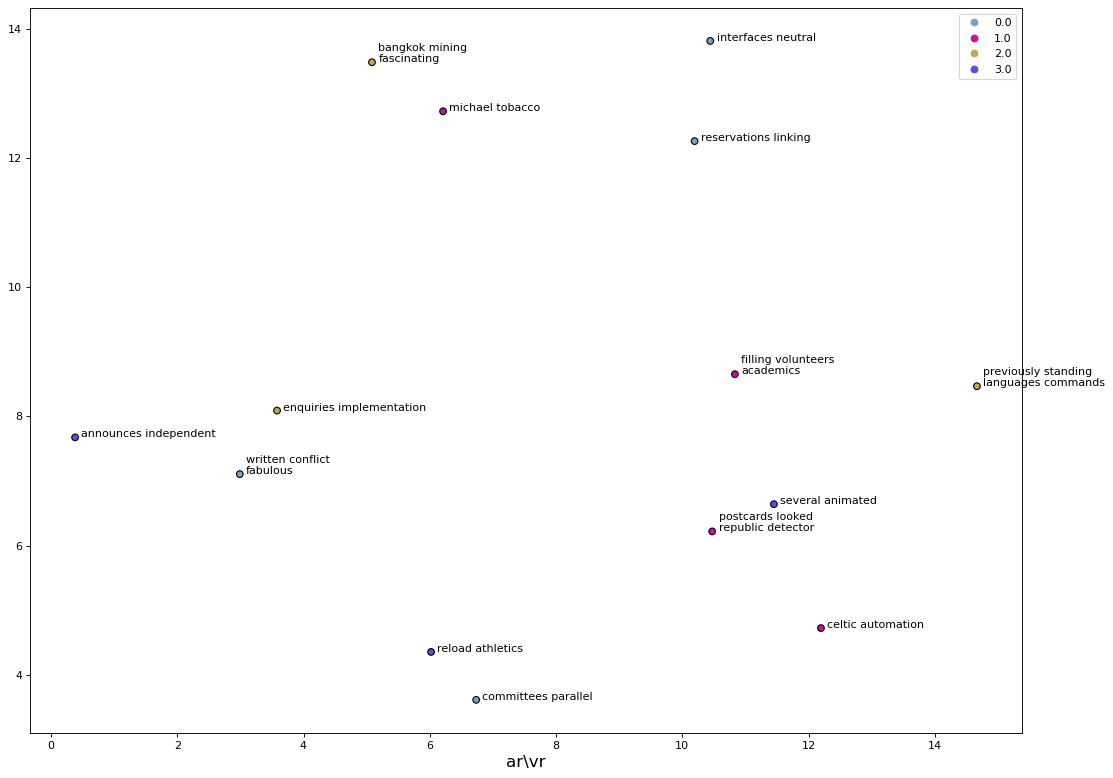

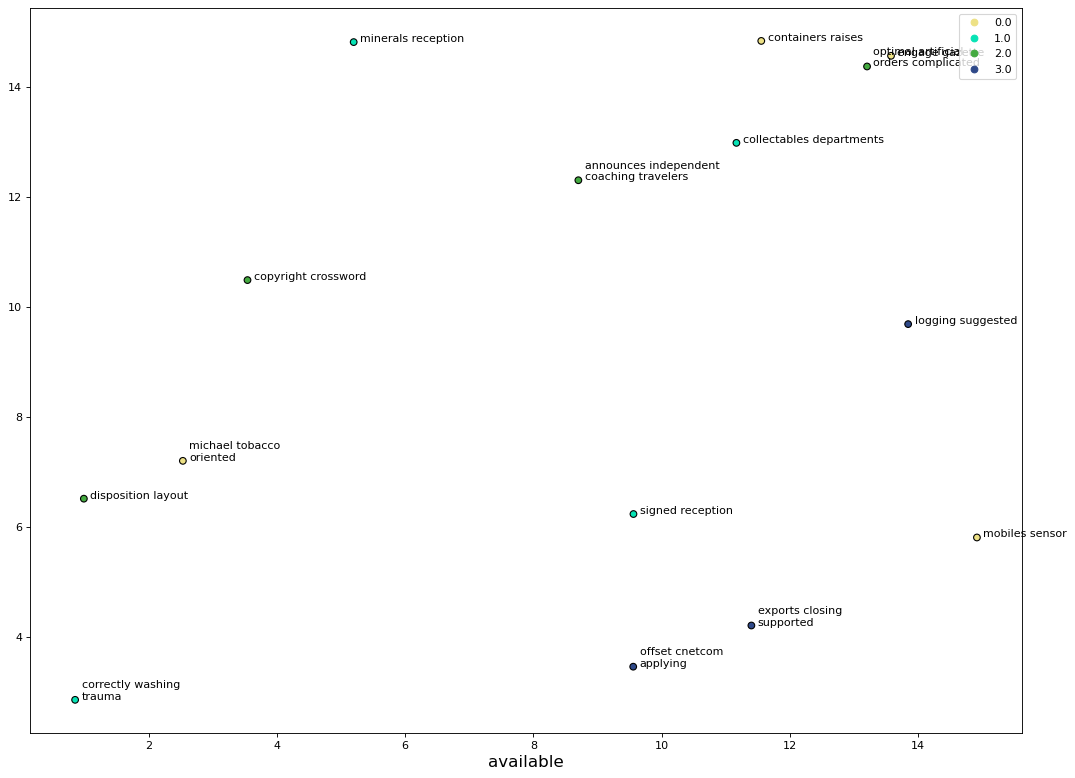

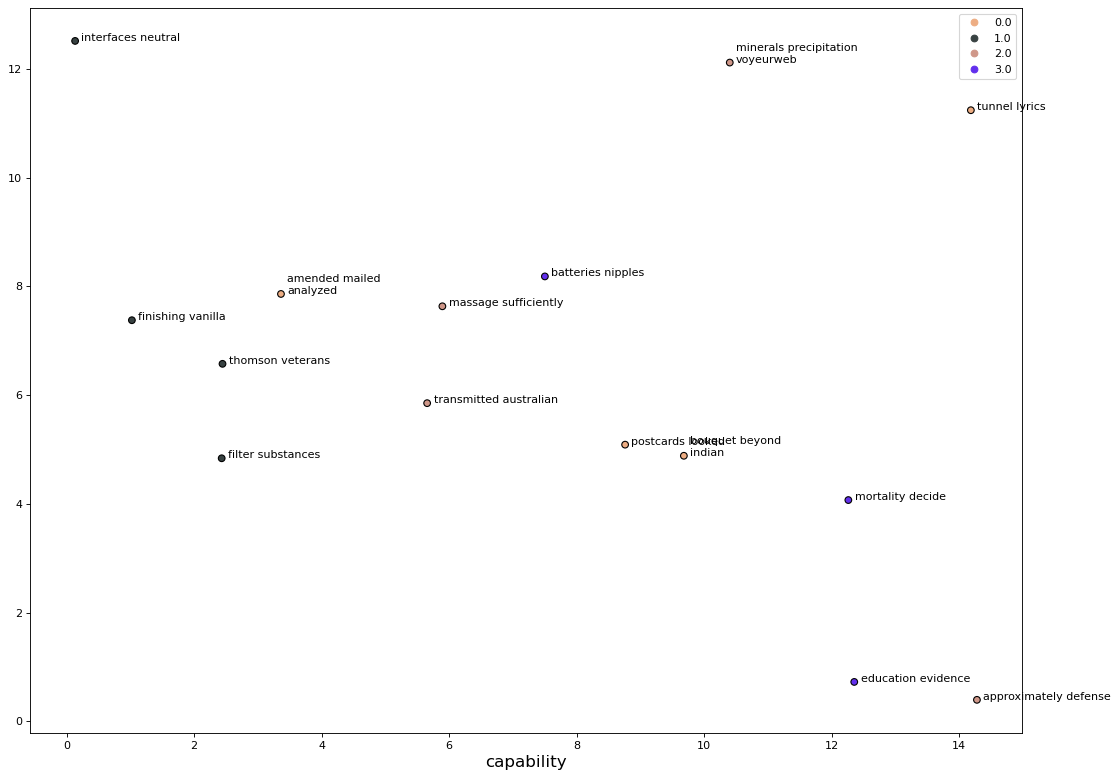

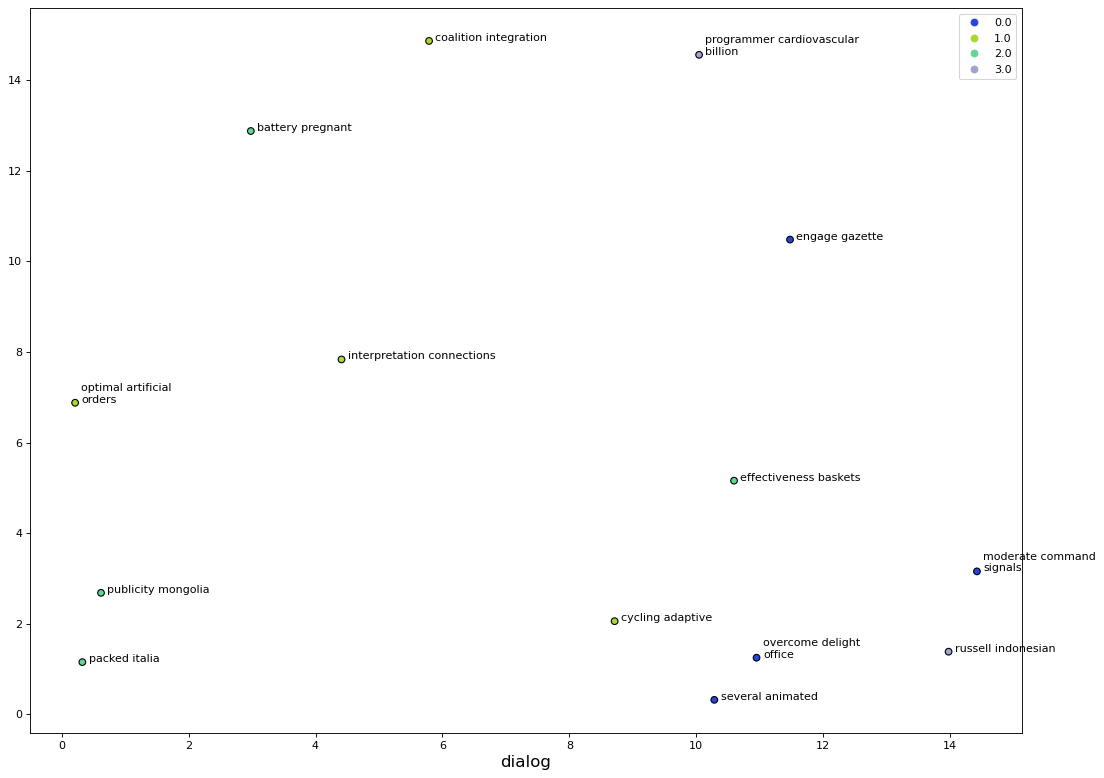

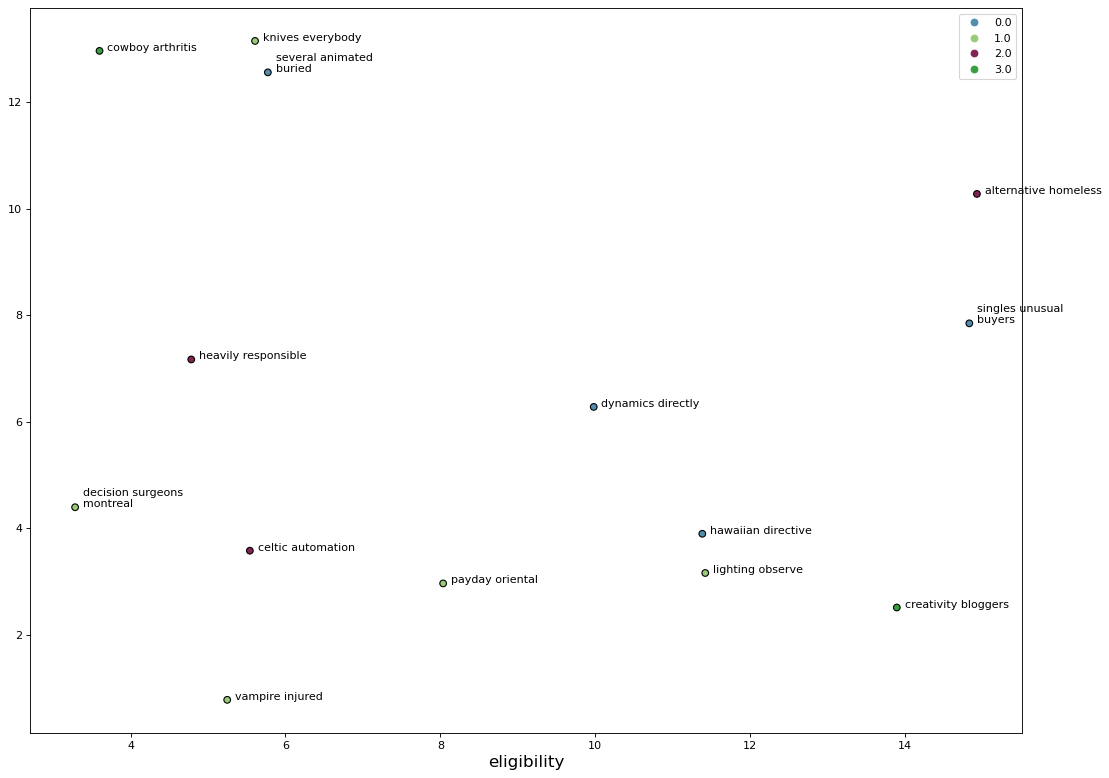

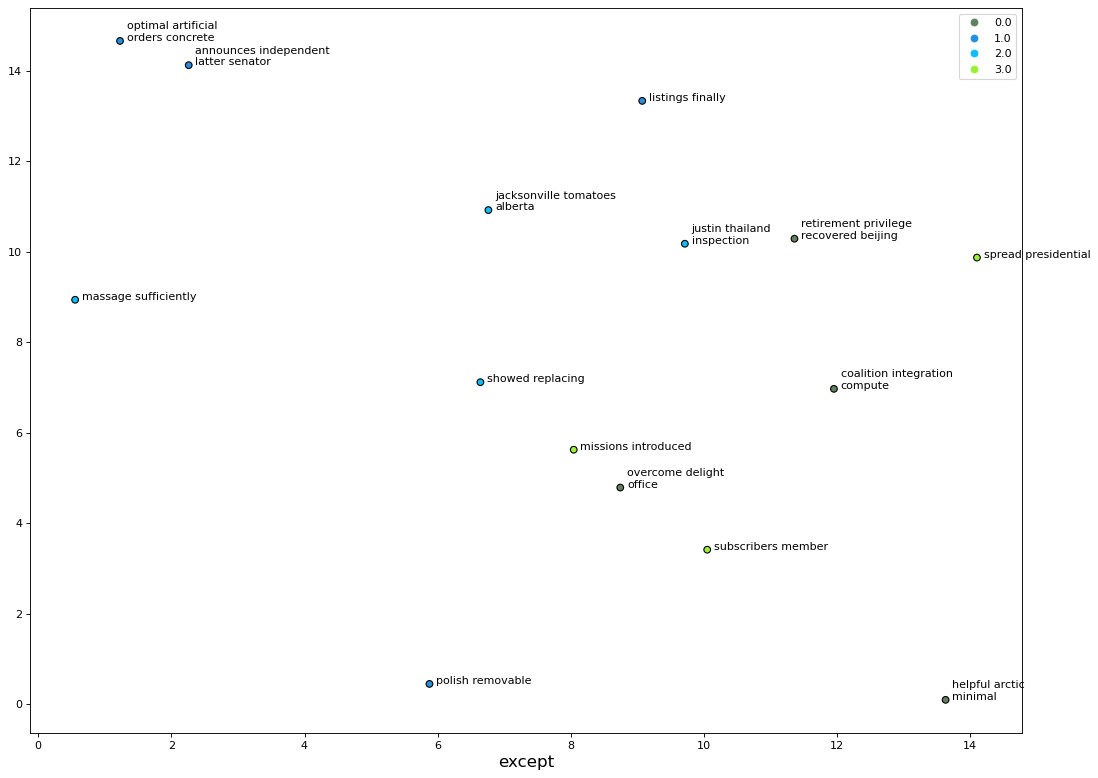

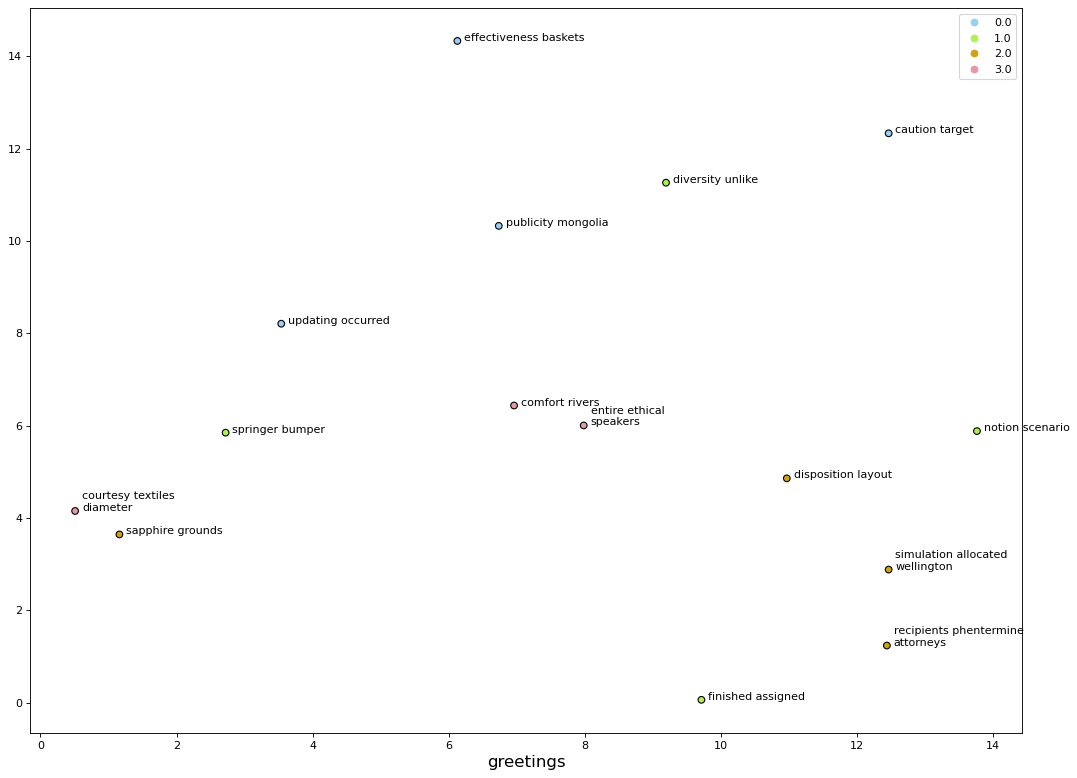

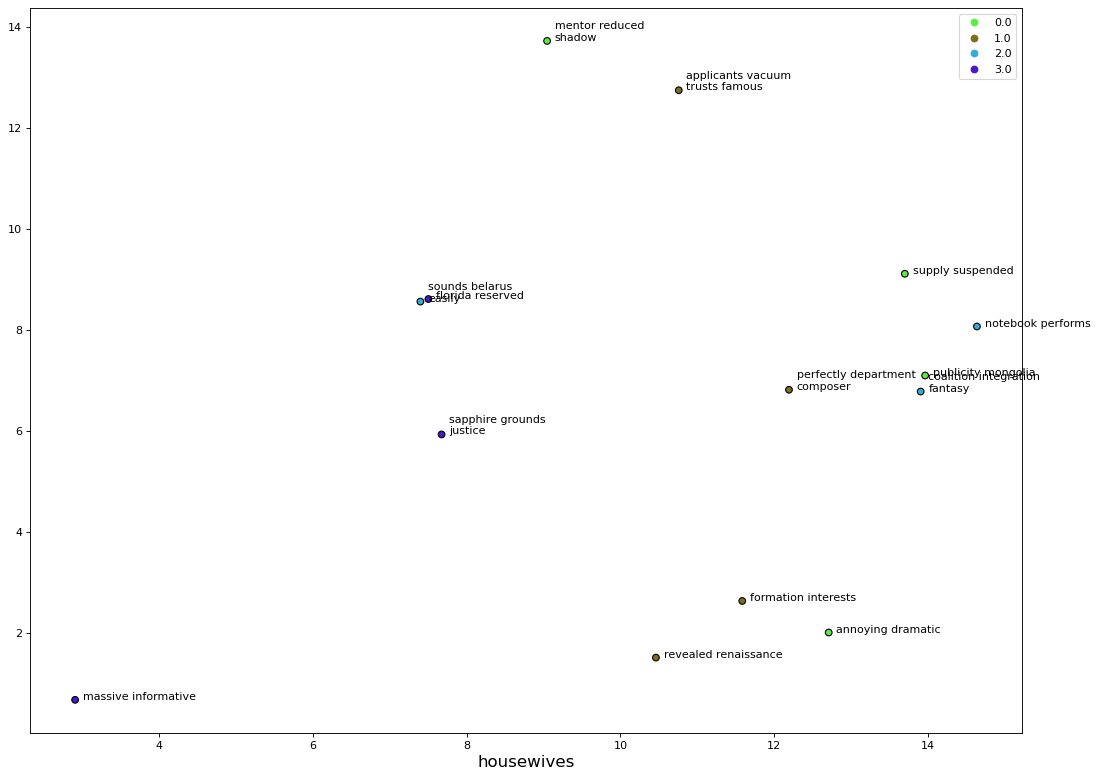

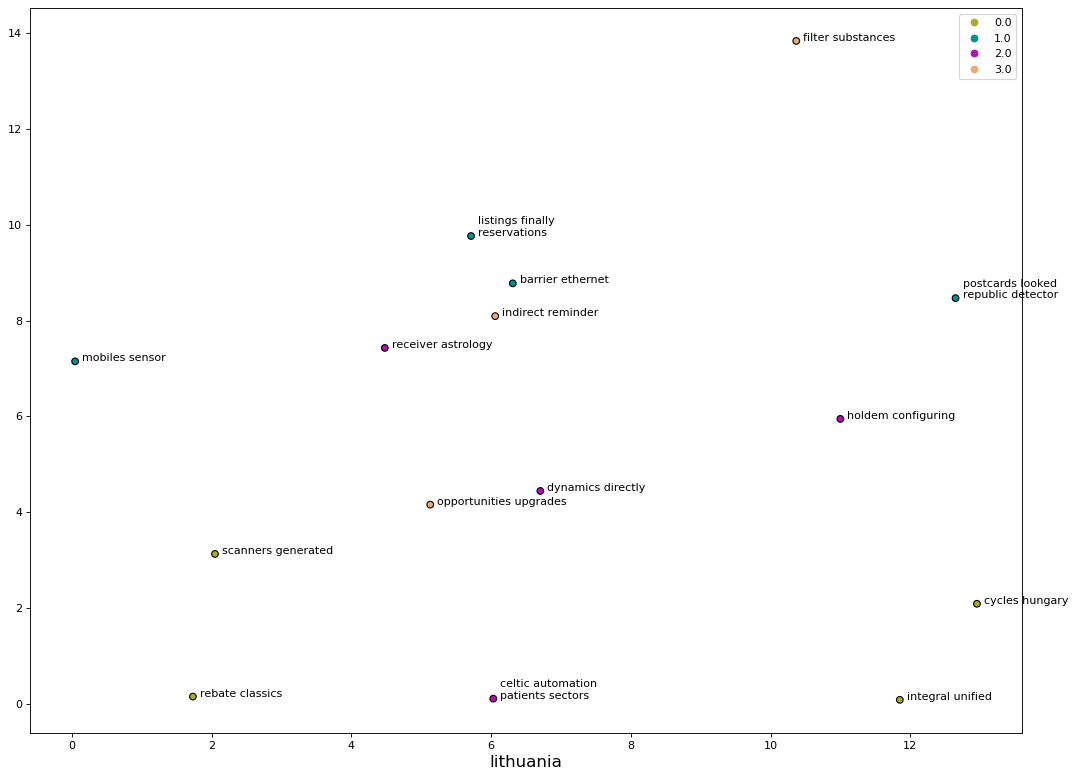

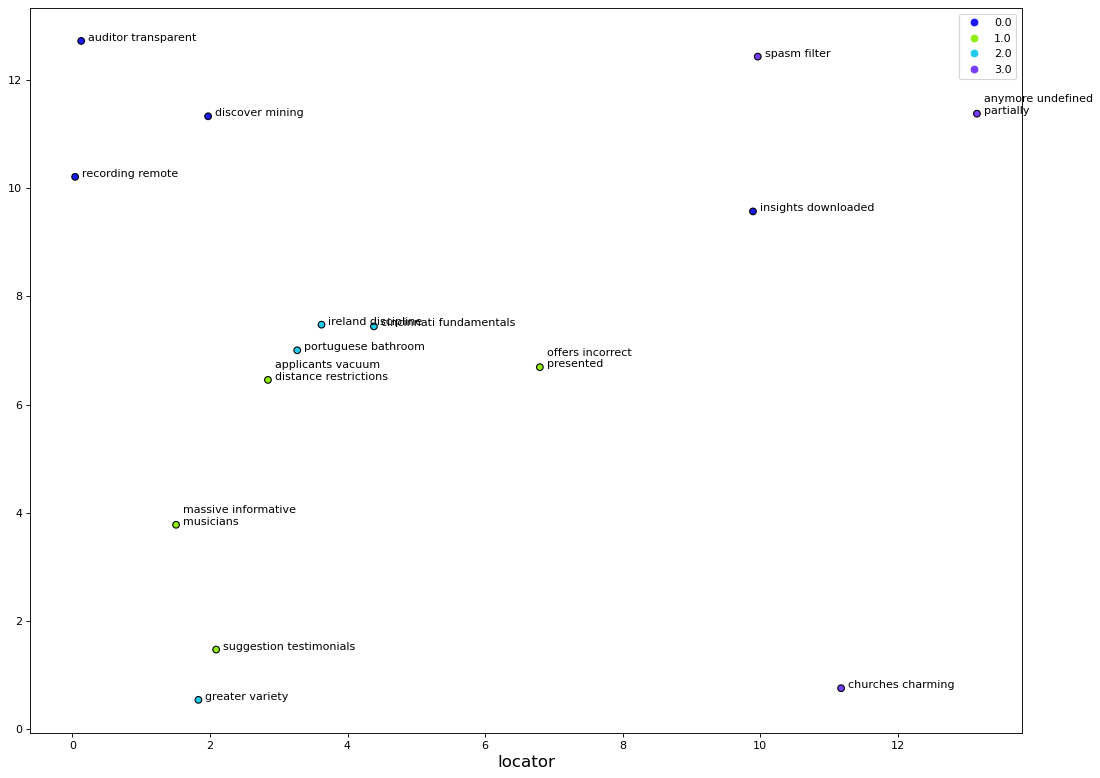

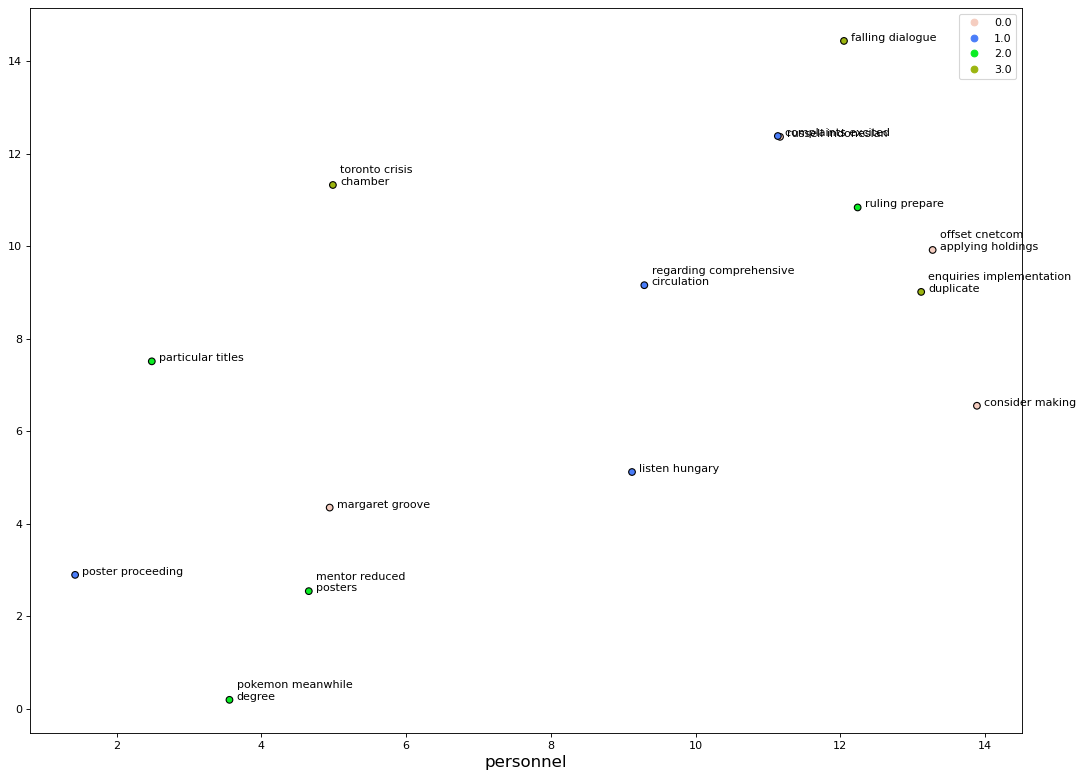

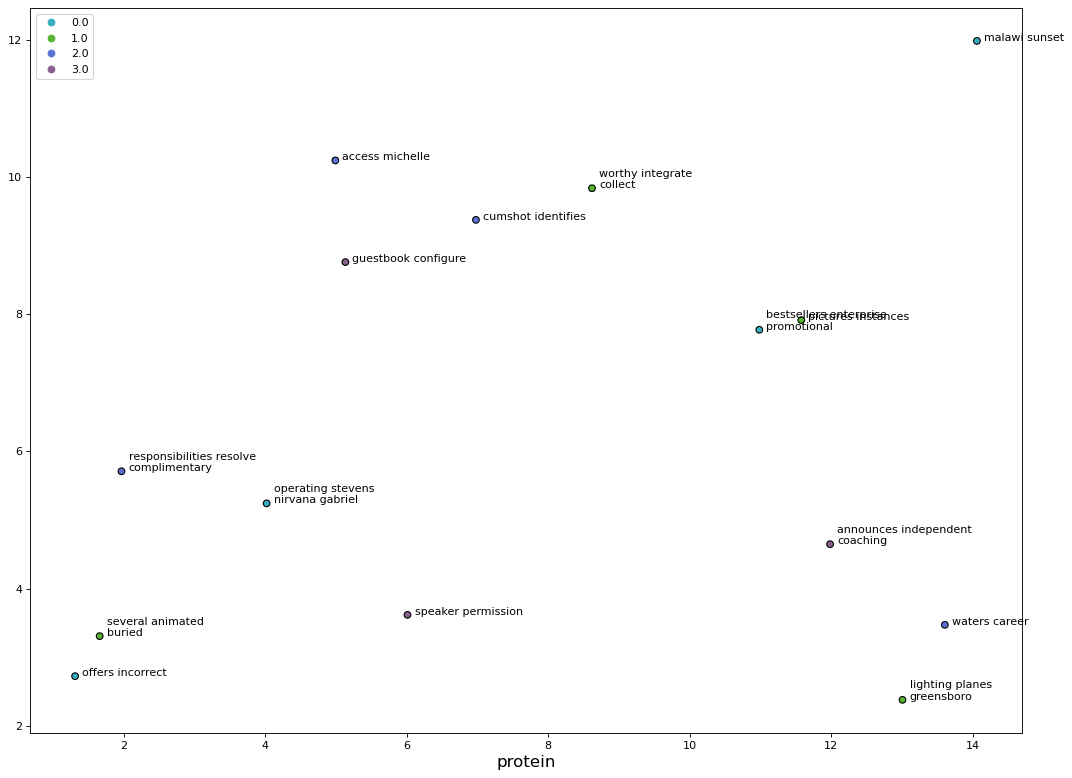

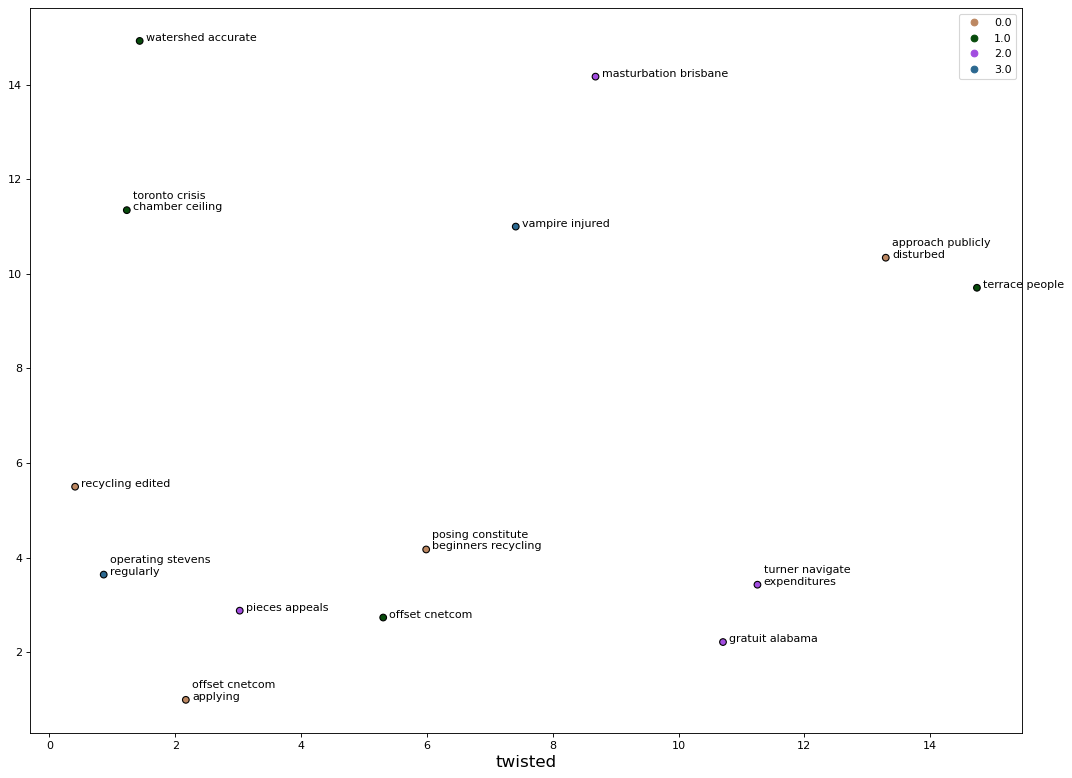

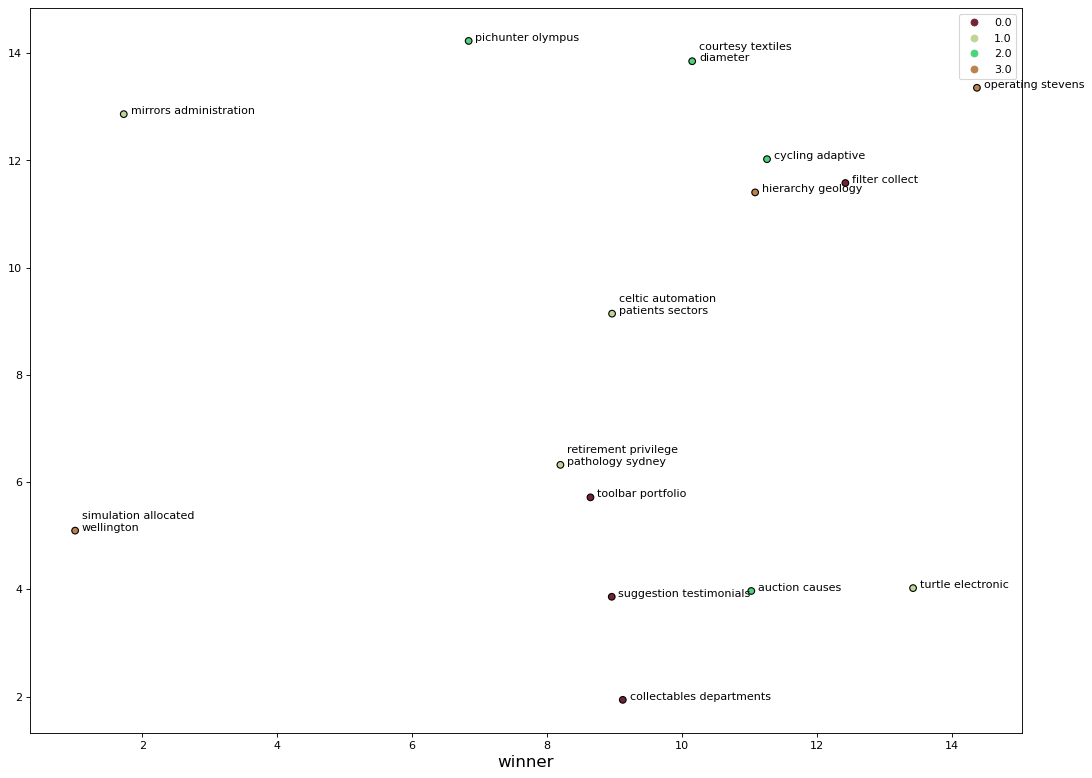

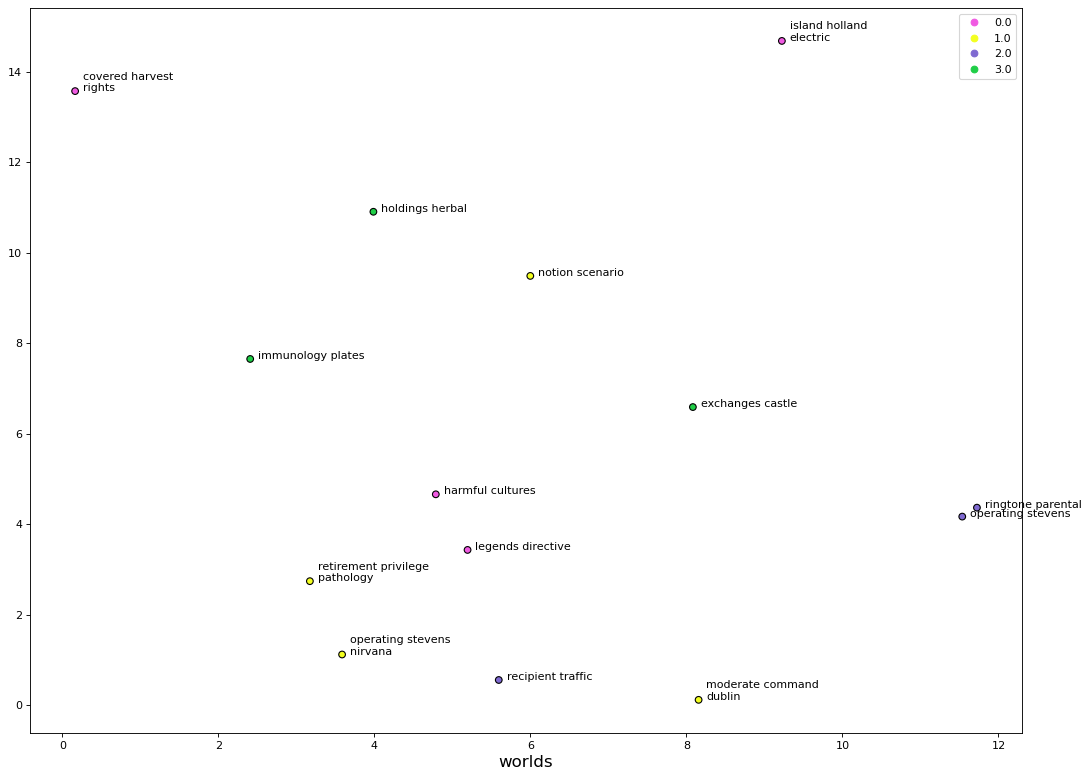

In [24]:
# Создание графиков для каждого значения 'area'

for val in main_df.index.levels[0]:
    # Размер
    plt.figure(figsize=(16, 12), dpi=80)

    # Значения для легенды
    colors = ListedColormap(c[val])
    classes = list(cluster_df[cluster_df['area'] == val]['cluster'].unique())
    values = list(cluster_df[cluster_df['area'] == val]['cluster'])

    # График рассеяния
    scatter = plt.scatter(X[val], y[val], c=values, cmap=colors, edgecolors= "black")

    # Подпись каждой точки
    list_kw = divide_word(list(kw[val]))
    for i, v in enumerate(values):
        plt.annotate(list_kw[i], (list(X[val])[i] + 0.1, list(y[val])[i]))

    # Отрисовка легенды
    plt.legend(handles=scatter.legend_elements()[0], labels=classes)

    # Footer
    plt.xlabel(val, fontsize=15)

    # Сохранение изображения
    file_name = val + '.png'
    # plt.savefig(file_name)